<a id='start'></a>

# Выявление закономерностей выявляющих успешность игр

## Описание проекта

На основании данных предоставленных интернет-магазином торгующим по всему миру компьютерными играми. Необходимо выделить актуальные консоли и составить портрет пользователей в различных регионах.





## План проекта

### [Шаг 1. Открыть файл с данными и изучить общую информацию](#step_1)

### [Шаг 2. Подготовить данные](#step_2)

1. Заменить названия столбцов (привести к нижнему регистру)
2. Преобразовать данные в нужные типы
    - Описать в каких столбцах заменил тип данных и почему
3. Обработать пропуски при необходимости 
    - Объяснить, почему заполнил пропуски определённым образом или почему не стал это делать
    - Описать причины, которые могли привести к пропускам
4. Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом  
    - Отдельно разобрать это значение и описать, как его обработать
5. Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец    

### [Шаг 3. Провести исследовательский анализ данных](#step_3)

1. Посмотреть, сколько игр выпускалось в разные годы
    - Важны ли данные за все периоды?
2. Посмотреть, как менялись продажи по платформам
    - Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам
    - За какой характерный срок появляются новые и исчезают старые платформы?  
3. Взять данные за соответствующий актуальный период
    - Определить актуальный период на основании исследования предыдущих вопросов (основной фактор — эти данные помогут построить прогноз на 2017 год)
    - Какие платформы лидируют по продажам, растут или падают?
    - Выбрать несколько потенциально прибыльных платформ
4. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам 
    - Описать результат
5. Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков  
    - Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами
    - Сформулировать выводы
    - Соотнести выводы с продажами игр на других платформах
6. Посмотреть на общее распределение игр по жанрам
    - Что можно сказать о самых прибыльных жанрах?
    - Выделяются ли жанры с высокими и низкими продажами?

### [Шаг 4. Составить портрет пользователя каждого региона](#step_4)

1. Определить для пользователя каждого региона (NA, EU, JP)
    - Топ-5 платформ
        - Описать различия в долях продаж
    - Топ-5 жанров    
        - Пояснить разницу
        - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### [Шаг 5. Проверить гипотезы](#step_5)

1. Средние пользовательские рейтинги платформ XboxOne и PC одинаковые
2. Средние пользовательские рейтинги жанров Action (англ. «действие»,экшен-игры) и Sports (англ. «спортивные соревнования») разные
    - Какой критерий применил для проверки гипотез и почему?

### [Шаг 6. Написать общий вывод](#step_6)

## Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры 
* NA_sales— продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales— продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB 
    
*ESRB(EntertainmentSoftwareRatingBoard) — это ассоциация, определяющая возрастной рейтинг компьютерных игр.<br>
*Данные за 2016 год могут быть неполными.

## Выполнение проекта

### Шаг 1. Открываем файл с данными и изучаем общую информацию, подключаем библиотеки<a id='step_1'></a>

[На начало](#start)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats as st

pd.options.display.float_format='{:.2f}'.format
games = pd.read_csv('/datasets/games.csv')

In [2]:
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,nan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,nan,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,nan,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,nan,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,nan,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


* Name - смущают пропуски в названии игр, тип данных подходящий
* Year_of_Release - есть пропуски, и тип данных сюда больше подойдет int
* Genre - есть пропуски, тип данных подходящий
* Critic_Score - есть пропуски, тип данных подходящий
* User_Score - есть пропуски, тип данных float больше подойдет
* Rating - есть пропуски, тип данных подходящий

In [4]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00


In [5]:
games.duplicated().sum()

0

### Шаг 2. Подготовка данных<a id='step_2'></a>

[На начало](#start)

#### Заменим названия столбцов (приведем к нижнему регистру)

In [6]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обратим внимание на аббревиатуру 'tbd' в столбцах с рейтингом

In [7]:
games.loc[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.00,Sports,3.45,2.59,0.00,0.66,nan,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.00,Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+
520,Zumba Fitness 2,Wii,2011.00,Sports,1.51,1.03,0.00,0.27,nan,tbd,T
645,uDraw Studio,Wii,2010.00,Misc,1.65,0.57,0.00,0.20,71.00,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,nan,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.00,Action,0.01,0.00,0.00,0.00,67.00,tbd,E
16697,Bust-A-Move 3000,GC,2003.00,Puzzle,0.01,0.00,0.00,0.00,53.00,tbd,E
16698,Mega Brain Boost,DS,2008.00,Puzzle,0.01,0.00,0.00,0.00,48.00,tbd,E
16704,Plushees,DS,2008.00,Simulation,0.01,0.00,0.00,0.00,nan,tbd,E


2424 игры с рейтингом 'tbd'. Не вижу никакой закономерности, игры с неопределенным рейтингом выходили на разных платформах, в разные года и имеют различный возрастной рейтинг. Буду обрабатывать их вместе с NaN.

*tbd - to be determined (будет определено)

In [8]:
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.NaN

#### Обработаем пропуски

Выведем процентное соотношение пропусков, по колонкам

In [9]:
for col in games:
    missing = np.mean(games[col].isnull())
    print('{} - {:.2f}%'.format(col, missing*100))

name - 0.01%
platform - 0.00%
year_of_release - 1.61%
genre - 0.01%
na_sales - 0.00%
eu_sales - 0.00%
jp_sales - 0.00%
other_sales - 0.00%
critic_score - 51.32%
user_score - 54.59%
rating - 40.48%


In [10]:
games.loc[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,nan,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,nan,NaN,NaN


Есть две игры без названия, удалим их так как это довольно старые игры

In [11]:
games.dropna(subset=['name'], inplace=True)

In [12]:
games.loc[games['year_of_release'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.57,1.02,0.00,0.41,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.36,0.14,0.00,0.03,nan,NaN,NaN


Не нашел способа адекватно восстановить год выпуска игр. Пропуски есть в играх выпущенных в разные года и на разных платформах. Заменю на нейтральное значение '-1'

In [13]:
games['year_of_release'] = games['year_of_release'].fillna(-1)

In [16]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games['rating'] = games['rating'].fillna('unknown')

Рейтинги я тоже не знаю как можно восстановить, из имеющихся данных. Поэтому заполнил нейтральными значениями.

In [17]:
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Преобразуем данные в нужные типы

In [18]:
games['year_of_release'] = games['year_of_release'].astype(int)
games['user_score'] = games['user_score'].astype(float)

- year_of_release - заменил на 'int', так как там хранятся только года
- user_score - заменил на 'float', так как колонка содержит вещественные числа

In [19]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null float64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец  

In [20]:
games = games.assign(all_sales = games['na_sales'] + games['eu_sales'] + games['jp_sales']
             + games['other_sales'])

games = games[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'all_sales', 'critic_score', 'user_score', 'rating']]

In [21]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,all_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.00,8.00,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,-1.00,-1.00,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.00,8.30,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.00,8.00,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,-1.00,-1.00,unknown


### Шаг 3. Проведем исследовательский анализ данных<a id='step_3'></a>

#### Посмотрим, сколько игр выпускалось в разные годы

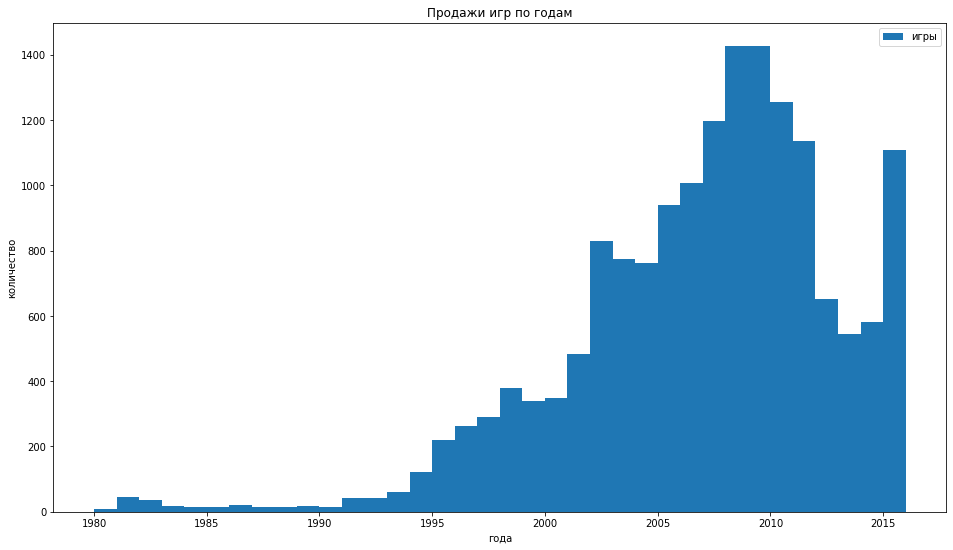

In [22]:
games_without_trash = games.loc[games['year_of_release'] != -1]
games_without_trash.plot(kind='hist', y='year_of_release', bins=36,
                                          figsize=(16, 9), title='Продажи игр по годам', label='игры',)
plt.ylabel('количество')
plt.xlabel('года')
plt.rcParams.update({'font.size': 14})

В 1993г. стартует 5-е поколение игровых консолей, появляются такие консоли как Nintendo 64 и Play Station. Так же начинает развиваться 3D графика в играх. С 2012г. начинает активно развиваться мобильный гейминг, возможно это связано с просадкой производства консольных и PC игр.

#### Посмотрим, как менялись продажи по платформам

In [23]:
def plot_builder(df):
    df.pivot_table(index='year_of_release', columns='platform',
                                values='all_sales',aggfunc=("sum")).plot(grid=True,
                                    figsize=(19, 10), fontsize=(14))

Text(0.5, 0, 'года')

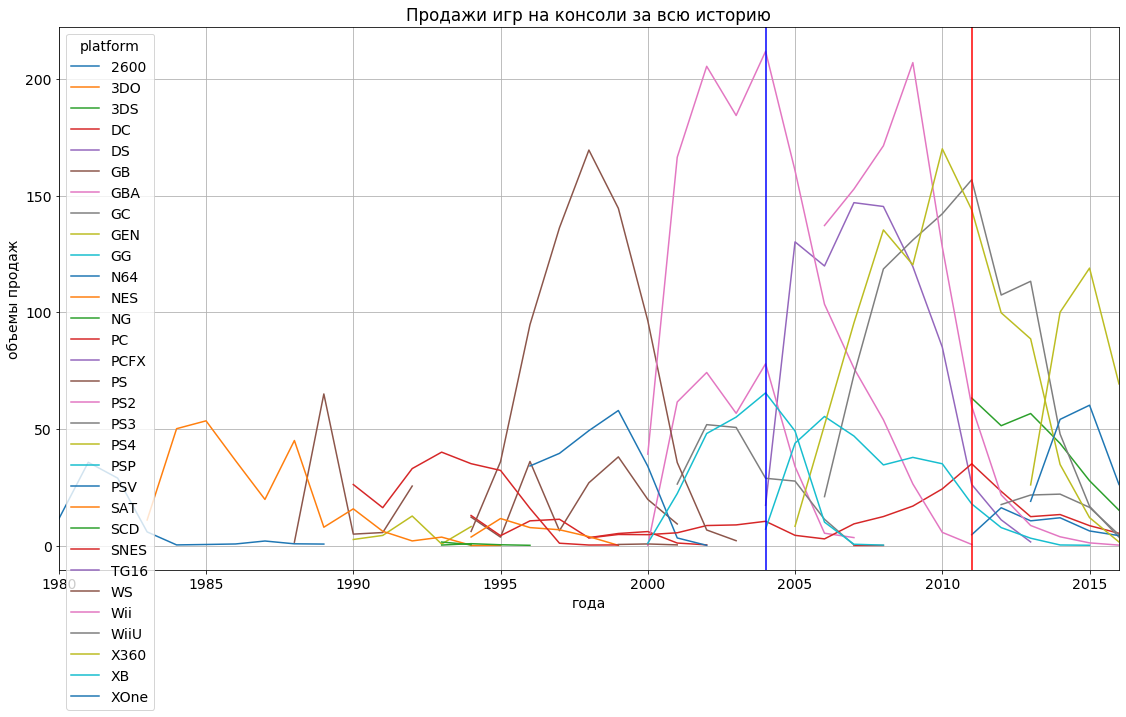

In [24]:
plot_builder(games_without_trash)
plt.axvline(x=2004, color='b')
plt.axvline(x=2011, color='r')
plt.title('Продажи игр на консоли за всю историю')
plt.ylabel('объемы продаж')
plt.xlabel('года')

С 2004г. началось седьмое поколение игровых консолей и на графике мы видим появление новых консолей, актуальных и по сей день. Но и их время уже подходит к концу, и с 2011 стартовало восьмое поколение, не имеющее пока достаточное количество продаж. Но при анализе важно не упустить их (3DS, XOne, WIIU, PSV, PS4)

#### Выберем платформы с наибольшими суммарными продажами и посмотрим на распределение по годам

In [25]:
top10_platforms = games_without_trash.groupby(
    'platform')['all_sales'].agg(sum).sort_values(ascending=False).head(10).reset_index()
top10_platforms = list(top10_platforms['platform'])
top10_platforms = games_without_trash.query('platform in @top10_platforms')

Получили таблицу платформ с наибольшим количеством проданных игр за все время

Text(0.5, 0, 'года')

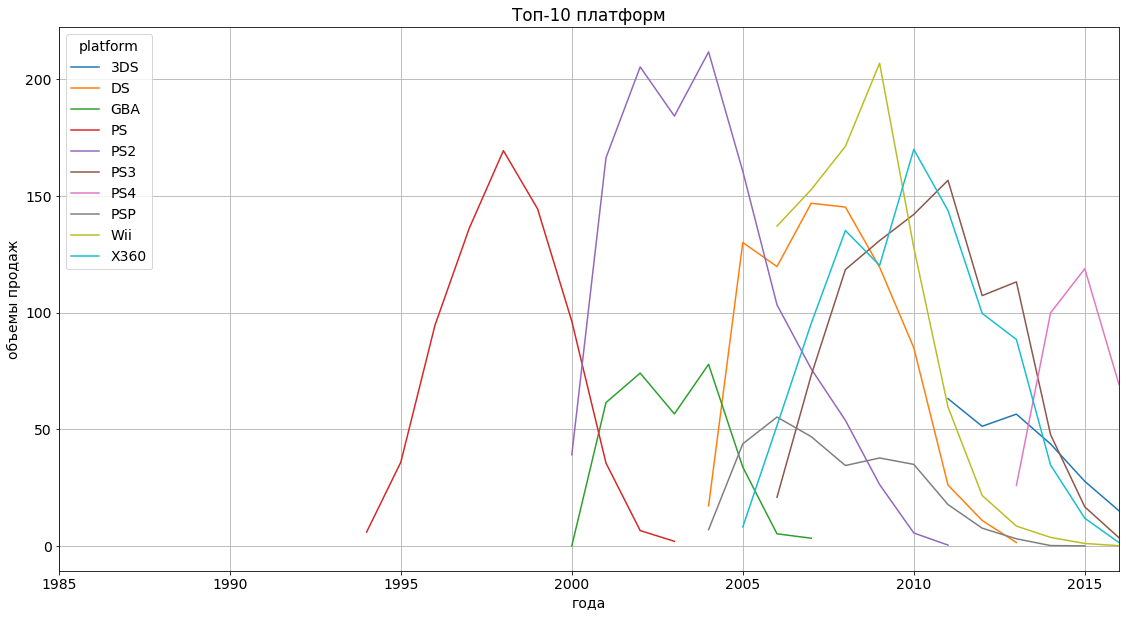

In [26]:
plot_builder(top10_platforms)
plt.title('Топ-10 платформ')
plt.ylabel('объемы продаж')
plt.xlabel('года')

По графику мы можем понять что, не все платформы с наибольшим количеством продаж нас интересуют, Play Station имеет большое количество продаж, но с 2003г. не было продано ни одной игры.

####  Определим жизненный цикл платформ

In [27]:
temp = games_without_trash.pivot_table(index=('platform','year_of_release'), aggfunc=(
    'count')).reset_index()
temp = temp.groupby('platform')['year_of_release'].agg("count").reset_index()
print('В среднем жизненный цикл консолей составляет: {} лет'
      .format(round(temp['year_of_release'].median())))

В среднем жизненный цикл консолей составляет: 7 лет


#### Возьмем данные за соответствующий актуальный период

Возьмем данные за последние 6 лет, так как время жизни консолей составляет 7 лет, а нам нужно построить прогноз на 2017г. То исключим из выборки консоли, игры на которые уже не продаются (PS2, DS, PSP).

Text(0.5, 0, 'года')

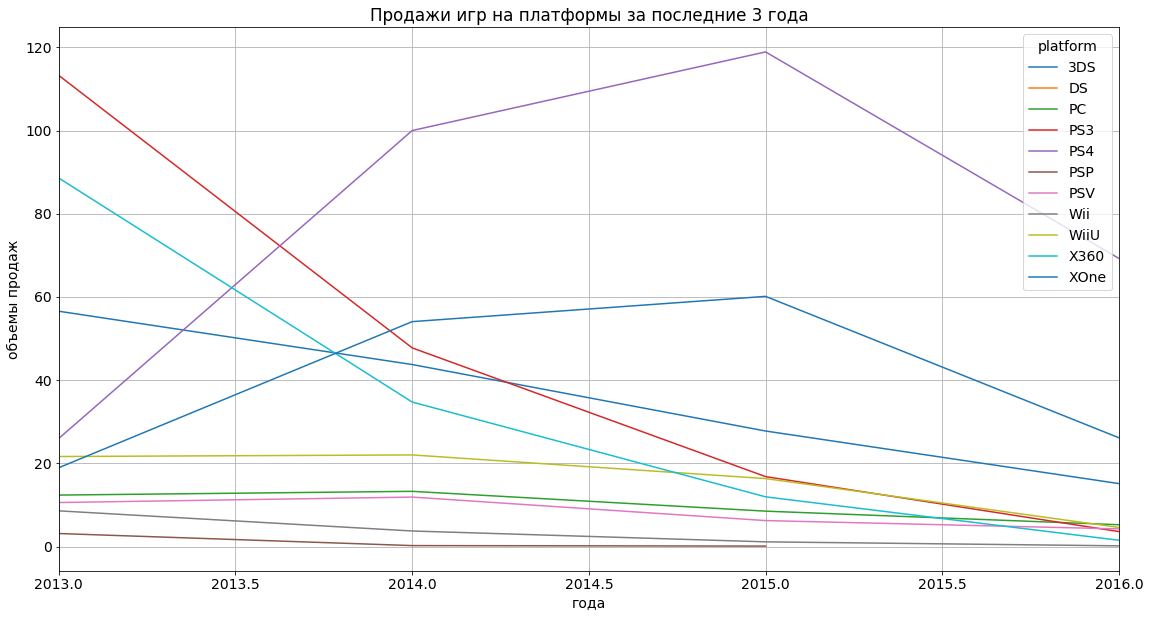

In [28]:
actual_games = games_without_trash.query('year_of_release >= 2013')
plot_builder(actual_games)
plt.title('Продажи игр на платформы за последние 3 года')
plt.ylabel('объемы продаж')
plt.xlabel('года')


Выделем для анализа next gen платформы


Text(0.5, 0, 'года')

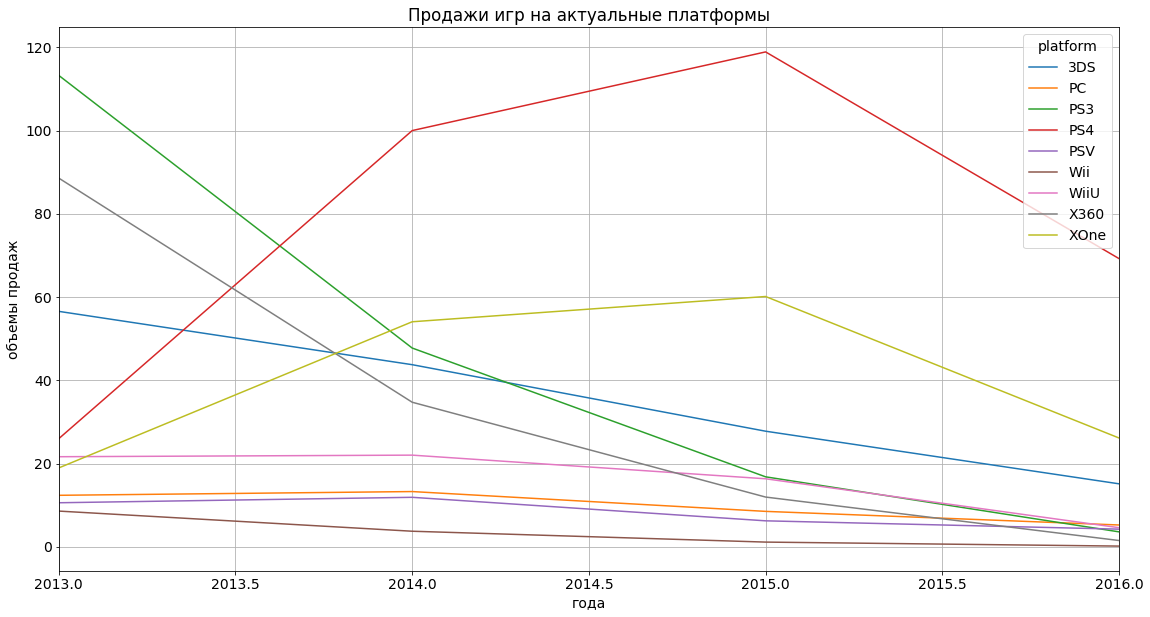

In [29]:
old_platform = ['PS2', 'DS', 'PSP']
actual_games = actual_games.query('platform not in @old_platform')
plot_builder(actual_games)
plt.title('Продажи игр на актуальные платформы')
plt.ylabel('объемы продаж')
plt.xlabel('года')

На графике мы видим общий нисходящий тренд в продаже игр. Но судя по графикам за весь период мы можем предположить что у новых игровых платформ (WiiU, PSV, 3DS, XOne, PS4) есть вероятность роста продаж. 
А такие платформы как Wii, PS3, X360 доживают последние годы.
Ну и PC на протяжение всей своей истории держится особняком и не теряет свою аудиторию.

Судя по популярности их предшественников наибольшую прибыль могут принести продажи игр на Play Staton 4 и Xbox One

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам 

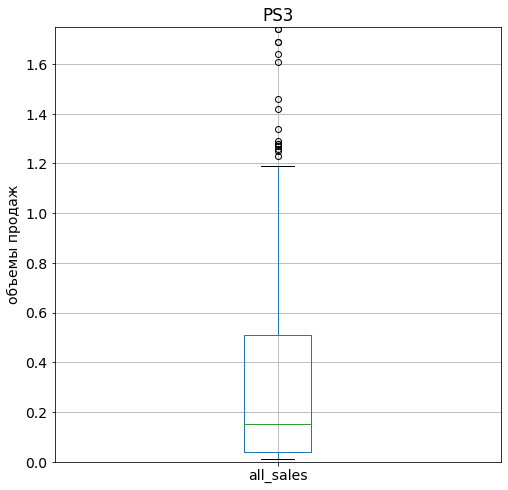

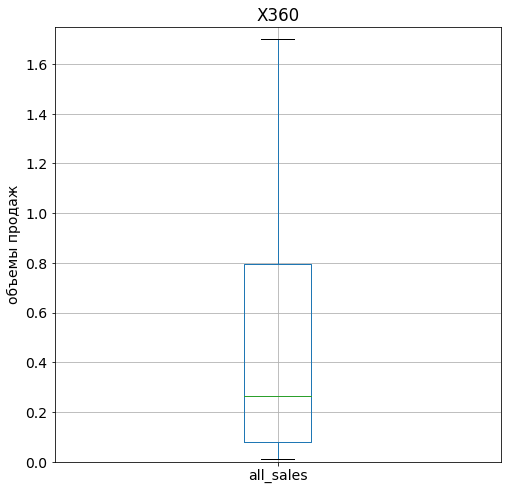

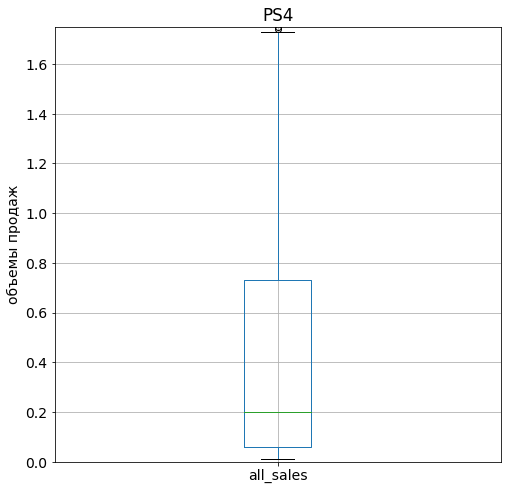

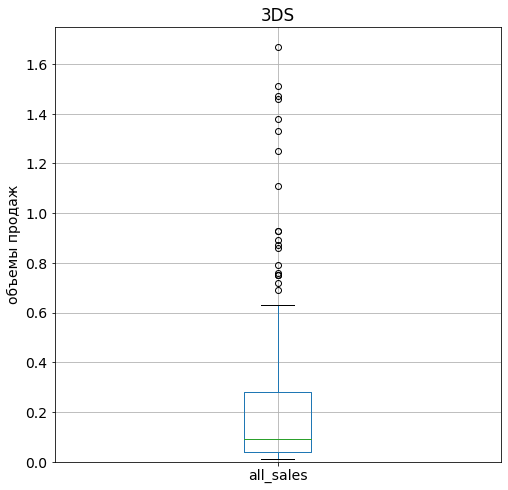

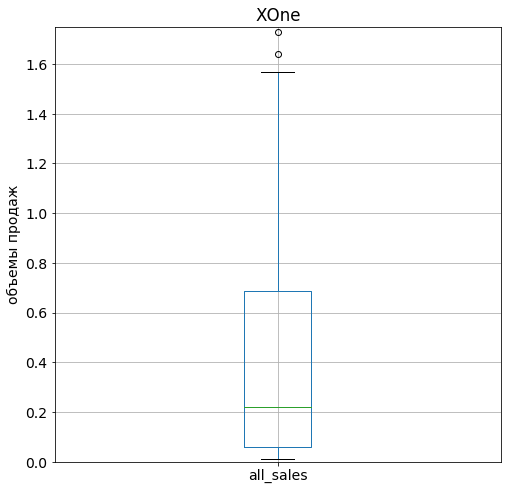

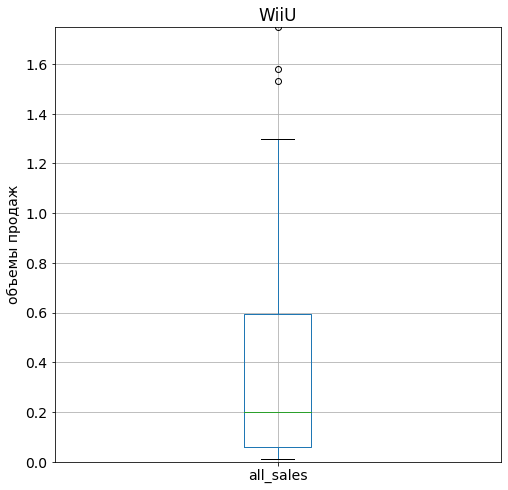

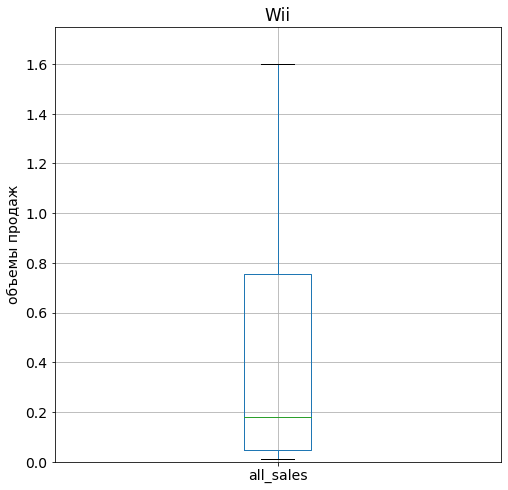

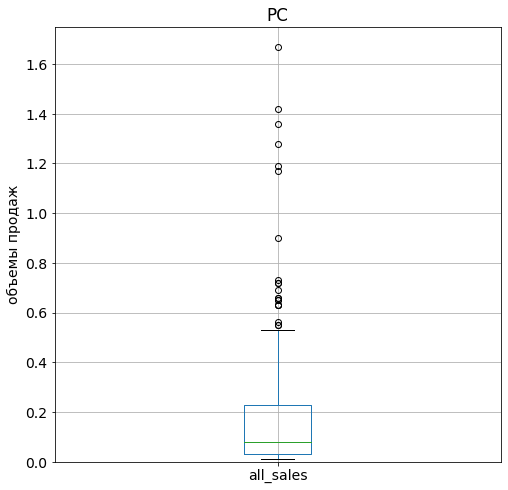

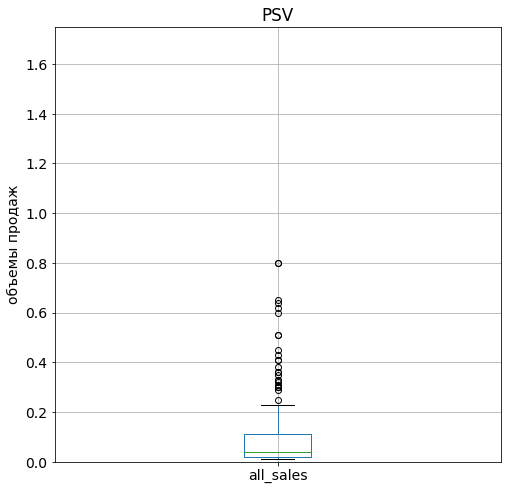

In [30]:
actual_platforms_list = actual_games['platform'].unique().tolist()
for i in actual_platforms_list:
    actual_games.loc[actual_games['platform'] == i].reset_index().boxplot(
        'all_sales', figsize=(8, 8))
    plt.title(i)
    plt.ylim(0, 1.75)
    plt.rcParams.update({'font.size': 14})
    plt.ylabel('объемы продаж')
    plt.show()

У консолей от Microsoft и Sony показатели из поколения в поколение схожи. У Nintendo продажи игр на консоль нового поколения (WiiU) схожи с продажами игр на XOne и PS4. У портативных консолей все не так хорошо, возможно их активно вытесняют игры на смартфонах.

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [32]:
critic_score = {}
user_score = {}

for i in actual_platforms_list: # Создает словарь из таблиц актуальных платформ
    critic_score[i] = actual_games.loc[(actual_games['platform'] == i) & 
                               (actual_games['critic_score'] != -1)].reset_index()

    user_score[i] = actual_games.loc[(actual_games['platform'] == i) & 
                               (actual_games['user_score'] != -1)].reset_index()

#### Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами

Text(0.5, 0, 'отзывы пользователей')

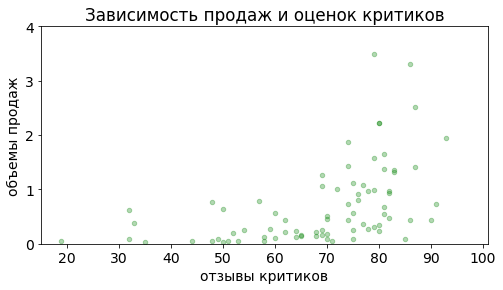

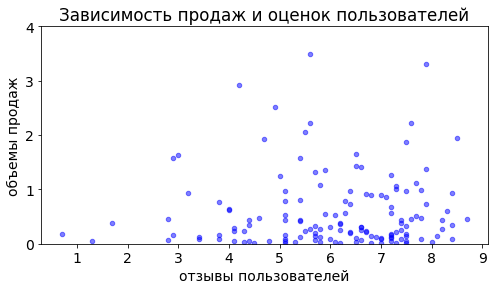

In [33]:
critic_score['X360'].plot(kind='scatter', x='critic_score', y='all_sales',
                       figsize=(8, 4), color='g', alpha=0.3)
plt.ylim(0,4)
plt.title('Зависимость продаж и оценок критиков')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы критиков')
user_score['X360'].plot(kind='scatter', x='user_score', y='all_sales',
                     figsize=(8, 4), color='b', alpha=0.5)
plt.ylim(0,4)
plt.rcParams.update({'font.size': 14})
plt.title('Зависимость продаж и оценок пользователей')
plt.ylabel('объемы продаж')
plt.xlabel('отзывы пользователей')

In [34]:
def correlation(platform):
    print('Корреляция объема продаж на {} и оценки критиков: {:.2f}'.format(platform,
    critic_score[platform]['all_sales'].corr(critic_score[platform]['critic_score'])))
    
    print('Корреляция объема продаж на {} и оценки пользователей: {:.2f}'.format(platform,
    user_score[platform]['all_sales'].corr(user_score[platform]['user_score'])))

In [35]:
correlation('X360')

Корреляция объема продаж на X360 и оценки критиков: 0.35
Корреляция объема продаж на X360 и оценки пользователей: -0.01


Линейная зависимость между оценками и объемами продаж не значительная. Причем мы видим что корреляция между оценками критиков и выручкой выше чем от оценок пользователей. Возможно это связано с тем, что люди покупают игры ориентируясь на оценки критиков.

In [36]:
for i in actual_platforms_list[1:]:
    correlation(i)
    print()

Корреляция объема продаж на X360 и оценки критиков: 0.35
Корреляция объема продаж на X360 и оценки пользователей: -0.01

Корреляция объема продаж на PS4 и оценки критиков: 0.41
Корреляция объема продаж на PS4 и оценки пользователей: -0.03

Корреляция объема продаж на 3DS и оценки критиков: 0.36
Корреляция объема продаж на 3DS и оценки пользователей: 0.24

Корреляция объема продаж на XOne и оценки критиков: 0.42
Корреляция объема продаж на XOne и оценки пользователей: -0.07

Корреляция объема продаж на WiiU и оценки критиков: 0.38
Корреляция объема продаж на WiiU и оценки пользователей: 0.42

Корреляция объема продаж на Wii и оценки критиков: nan
Корреляция объема продаж на Wii и оценки пользователей: 0.68

Корреляция объема продаж на PC и оценки критиков: 0.20
Корреляция объема продаж на PC и оценки пользователей: -0.09

Корреляция объема продаж на PSV и оценки критиков: 0.25
Корреляция объема продаж на PSV и оценки пользователей: 0.00



На всех платформах показатели примерно сходятся.

#### Посмотрим на общее распределение игр по жанрам

Text(0.5, 0, 'жанры')

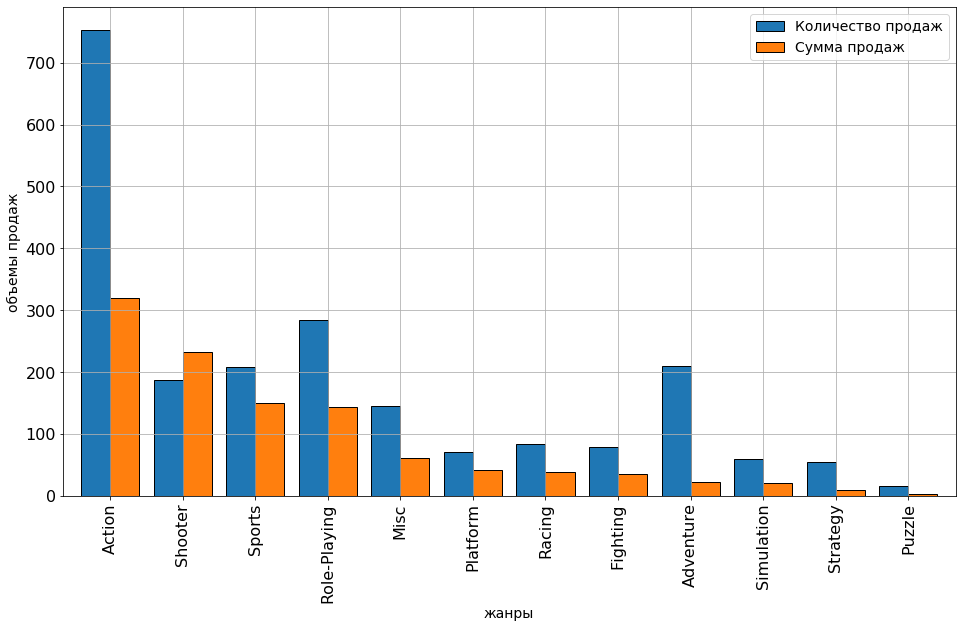

In [37]:
actual_games.pivot_table(index='genre', values='all_sales', aggfunc=('count', 'sum')
                        ).sort_values('sum', ascending=False).plot(kind='bar', figsize=(16, 9),
                                             ec='black', width=0.8, fontsize=(16), grid=True)
plt.legend(['Количество продаж', 'Cумма продаж'])
plt.rcParams.update({'font.size': 14})
plt.ylabel('объемы продаж')
plt.xlabel('жанры')

Самыми прибыльными играми со стороны магазина являются игры жанра Action несмотря на то, что каждая отдельная игра продается не так хорошо как игры жанра Shooter. Но мы как магазин не несем больших затрать на производство, а затраты на логистику с лихвой компенсируются объемами продаж.

Гораздо лучше продаются игры с активным геймплейем, и хуже игры требующие вдумчивости.

### Шаг 4. Составим портрет пользователя каждого региона<a id='step_4'></a>


#### Определим для пользователя каждого региона (NA, EU, JP)

In [38]:
region_list = ['na_sales', 'eu_sales', 'jp_sales']

In [39]:
title_top = {'na_sales':'    Лидеры продаж в США', 'eu_sales':'\
    Лидеры продаж в Европе', 'jp_sales':'    Лидеры продаж в Японии'}

def region_rating(col):    # функция для вывода топов продаж по заданной колонке
    temp2 = actual_games
    if col == 'rating':
        temp2 = temp2.loc[temp2['rating'] != 'unknown']
    for i in region_list:
        temp = temp2.pivot_table(index=col, values=(i), aggfunc=('sum')
                        ).reset_index()
        temp['percent'] = (temp[i] / temp[i].sum()).agg(lambda x: '{:.2%}'.format(x))
       
        print(title_top[i], temp[[col, i, 'percent']].sort_values(i,
                                                        ascending=False).head(5), sep='\n')
        print()

In [40]:
# КОД РЕВЬЮВЕРА

na_platforms = actual_games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False).head(5)
na_platforms['%'] = na_platforms['na_sales'] / na_platforms['na_sales'].sum() * 100
display(na_platforms)

,na_sales,%
platform,,
PS4,108.74,28.23
XOne,93.12,24.17
X360,81.66,21.20
PS3,63.50,16.48
3DS,38.20,9.92


#### Топ-5 платформ

В колонке "percent" процент от общих продаж в мире

In [41]:
region_rating('platform')

    Лидеры продаж в США
  platform  na_sales percent
3      PS4    108.74  24.88%
8     XOne     93.12  21.30%
7     X360     81.66  18.68%
2      PS3     63.50  14.53%
0      3DS     38.20   8.74%

    Лидеры продаж в Европе
  platform  eu_sales percent
3      PS4    141.09  36.07%
2      PS3     67.81  17.33%
8     XOne     51.59  13.19%
7     X360     42.52  10.87%
0      3DS     30.96   7.91%

    Лидеры продаж в Японии
  platform  jp_sales percent
0      3DS     67.81  49.32%
2      PS3     23.35  16.98%
4      PSV     18.59  13.52%
3      PS4     15.96  11.61%
6     WiiU     10.88   7.91%



Рынок США очень большой и они занимают большую долю среди большинства популярных консолей. Самой популярной в США является X360, на последнем месте XOne но я предполагаю что это связано с тем что консоль новая. <br>
В Европе лидирует PS3, но PS4 уже на третьей позиции. Замыкает топ-5 Европы новая консоль он Nintendo.<br>
В Японии популярна 3DS, в общем японцы патриоты и пользуются в основном отечественными консолями, а еще в Японии наиболее популярны портативные консоли.


Если брать данные за более короткий период, то рынки Европы и США становятся более похожими. Но в США XOne отстает от PS4 совсем не значительно. На Японском рынке без изменений.


#### Топ-5 жанров

In [42]:
region_rating('genre')

    Лидеры продаж в США
           genre  na_sales percent
0         Action    125.83  28.78%
8        Shooter    109.74  25.10%
10        Sports     65.27  14.93%
7   Role-Playing     46.40  10.61%
3           Misc     27.46   6.28%

    Лидеры продаж в Европе
           genre  eu_sales percent
0         Action    117.87  30.13%
8        Shooter     87.86  22.46%
10        Sports     60.34  15.42%
7   Role-Playing     36.97   9.45%
6         Racing     20.19   5.16%

    Лидеры продаж в Японии
          genre  jp_sales percent
7  Role-Playing     50.01  36.37%
0        Action     39.65  28.84%
3          Misc      9.03   6.57%
2      Fighting      7.63   5.55%
8       Shooter      6.61   4.81%



Мы видим что в США и Европе предпочтения по жанрам схожи, только нижние позиции меняются местами. <br>
А вот в Японии самым популярным жанром является RPG, не даром в Японии ролевые игры получили свой собственный поджанр JRPG. И шутеры занимающие второе место в остальных регионах, в Японии опустились на последнее место рейтинга

In [43]:
region_rating('rating')

    Лидеры продаж в США
  rating  na_sales percent
2      M    165.21  47.48%
0      E     78.94  22.69%
1   E10+     54.02  15.52%
3      T     49.79  14.31%

    Лидеры продаж в Европе
  rating  eu_sales percent
2      M    145.32  46.49%
0      E     82.80  26.49%
1   E10+     42.53  13.61%
3      T     41.95  13.42%

    Лидеры продаж в Японии
  rating  jp_sales percent
3      T     20.44  36.87%
0      E     15.00  27.06%
2      M     14.11  25.45%
1   E10+      5.89  10.62%



- «EC» («Early childhood») — Для детей младшего возраста
- «E» («Everyone») — Для всех
- «E10+» («Everyone 10 and older») — Для всех от 10 лет и старше
- «T» («Teen») — Подросткам
- «M» («Mature») — Для взрослых
- «AO» («Adults Only 18+») — Только для взрослых
- «RP» («Rating Pending») — Рейтинг ожидается


И здесь мы видим четкие различия между предпочтениями игроков из Японии и остальных регионов. <br>
В США и Европе предпочтения опять сходятся и на первом месте в обоих регионах игры с рейтингом "для взрослых".
В США продается почти 95% от всех продаж в мире, игр с рейтингом 'EC'. <br>
В Европе на последней строчке игры не получившие ещё рейтинг. <br>
Японцы предпочитают игры для всей семьи и для подростков, игры  с рейтингом "для взрослых"  здесь находятся на третьем месте.


За последнее время Японцы начали предпочитать игры для подростков.
На остальных рынках без изменений


### Шаг 5. Проверим гипотезы<a id='step_5'></a>

####  H₀: Средние пользовательские рейтинги платформ XboxOne и PC одинаковые <br> H₁:  Средние пользовательские рейтинги платформ XboxOne и PC разные

Так как сравниваемые выборки не зависимы между собой, будем использовать T-критерий Стьюдента

In [44]:
df_xone = user_score['XOne']
df_pc = user_score['PC']

np.var(df_xone['user_score']) / np.var(df_pc['user_score'])

0.6287553781936279

In [45]:
alpha = 0.05

result = st.ttest_ind(df_xone['user_score'], df_pc['user_score'], equal_var = False)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута и игры на XOne и PC с высокой вероятностью имеют одинаковый средний рейтинг.

#### H₀: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые <br> H₁:  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [46]:
df_action = actual_games.loc[(actual_games['genre'] == 'Action') & 
                               (actual_games['user_score'] != -1)]
df_sports = actual_games.loc[(actual_games['genre'] == 'Sports') & 
                               (actual_games['user_score'] != -1)]

np.var(df_action['user_score']) / np.var(df_sports['user_score'])

0.5566653233012586


Дисперсии существенно различаются на обеих выборках (equal_var = False)


In [47]:
alpha = 0.05

result = st.ttest_ind(df_action['user_score'], df_sports['user_score'], equal_var = False)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.4191414517472698e-20
Отвергаем нулевую гипотезу


Нулевая гипотеза отвергнута и с большой долей вероятности мы можем говорить о том что средний пользовательский рейтинг игр жанров 'Action' и 'Sports' различаются.

### Шаг 6. Общий вывод<a id='step_6'></a>

На данный момент мы видим падение рынка видео игр, в связи с совпадением общего направления рынка (игры на телефонах вытесняют другие игровые платформы) и локального тренда (новые игровые платформы еще не успели набрать популярность, и на старые платформы уже выпускается меньше игр). Средняя продолжительность жизни консолей 7лет. <br>
Рейтинги пользователей практически не влияют на продажи игр, рейтинги критиков влияют на продажи в большей степени, но так же не значительно. <br>
Самыми популярными играми в мире являются жанры с активным геймплейем(action, shoters, sports). Иры жанров требующих больше внимательности и вдумчивости занимают последние строчки рейтинга (adventure, strategy, puzzle).<br>
43% игр жанра Action покупаются в США. 48% игр с рейтингом "для взрослых" продаются в США.<br>
 Европейцы также предпочитают Action среди остальных жанров. 36% от мировых продаж игр с рейтингом "для взрослых" приходится на Европу.<br>
 Японские игроки сильно выделяются на фоне остальных своими предпочтениями. Здесь популярны мобильные консоли, самая популярная платформа в Японии 3DS 39% игр проданных в мире на эту консоль купили Японцы. В Японии предпочитают играть в RPG. У Японцев лидируют игры с рейтингом "для всех"
 
Предлагаю обратить внимание на новое поколение консолей (XOne, PS4, WiiU). Ориентируясь на продажи прошлых поколений и на набирающую популярность этого. Предлагаю таргетировать рекламу игр на XOne на рынок США, игры на PS4 на игроков из Европы и Японии. Не стоит забывать о PC геймерах они приносят небольшую, но зато стабильную прибыль.
В Европе и США продвигать игры  жанров: action, shoters, sports и с рейтингом "для взрослых". Японским игрокам больше подойдут RGP с рейтингом "для всех" 


 В последнее время игроки из Европы и США предпочитают играть на PS4, но в США XOne не сильно уступает Японскому конкуренту.
